# Open-Shop Scheduling

The problem is about making a job schedule for machines. A given work is made of jobs, which take specified time. It is presented as a matrix where rows are work, values are time units needed to finish a job. Every job can be completed on any machine in any order.

Our only constraint is that we cannot use the same machine at the same time.

```python
[
  [67, 79, 72, 71, 11],
  [23, 87, 90, 48, 27],
  [98, 86, 66, 78, 22],
  [70, 65, 66, 51, 39],
  [94, 75, 18, 34, 21]
]
```


We will try to solve the problem firstly using genetic algorithm (GA) then PSA (particle swarm algorithm).

After that we will run tests for both of them and finally compare them against each other in relation to this particular issue.


In [1]:
# We import the necessary data from the file commons.py
from commons import *

# We save our matrix in a variable so we can use it later
processing_times = m1


# GA algorithm

Firstly we will try to solve the problem with the genetic algorithm. The fitness function is the following:


In [2]:
def fitness_func(solution: list[int], solution_idx: int = 0) -> int:
    number_of_jobs = len(processing_times)
    number_of_machines = len(processing_times[0])

    # Chromosome has a shape of a vector, so we need to reshape it to a matrix
    schedule: list[list[int]] = solution.reshape(
        number_of_jobs, number_of_machines)
    # Generate matrix with times of finishing tasks on machines
    machine_times = np.zeros(number_of_machines)

    # Iterate over all jobs and machines
    for i in range(len(schedule)):
        for j in range(len(schedule)):
            # We get a machine index from generated schedule
            machine_idx = schedule[i, j]
            # We add processing time of a job on a machine to the time of finishing the job
            machine_times[machine_idx - 1] += processing_times[i, j]

    # We return a negative value because we are interested in minimizing the time, and AG is used to maximize
    # If we have maximum time of working on one machine, then the rest of the machines worked shorter
    # We want a schedule that will make all machines finish work in the shortest time possible
    return -np.max(machine_times)

Parameters of a GA function are as follows

We code our chromosome as an array of integers and than in fitness we reshape it to a matrix of the same size as the processing_times matrix.

To simplify our problem we take the number of machines as number of columns in processing_times.


In [3]:
# Value in a gene are numbers from 1 to the number of tasks
gene_space = np.arange(1, len(processing_times) + 1, 1)
sol_per_pop = 100
num_genes = len(processing_times) * len(processing_times[0])

num_parents_mating = 20
num_generations = 100
keep_parents = 10

parent_selection_type = "rank"

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10


In [4]:
import pygad as pg

ga_instance = pg.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    gene_type=int,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    stop_criteria="saturate_7",
    mutation_percent_genes=mutation_percent_genes,
)
ga_instance.run()

Parameters of the best solution: 
[[5 3 2 1 2]
 [1 3 2 4 5]
 [1 3 2 4 3]
 [5 4 1 3 1]
 [2 3 4 3 5]]
Fitness value of the best solution = -239.0
9


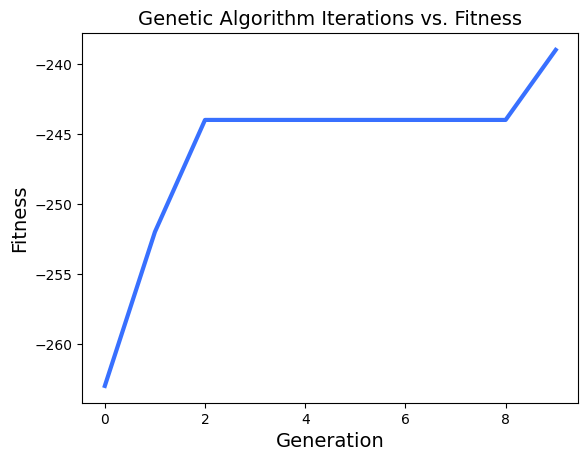

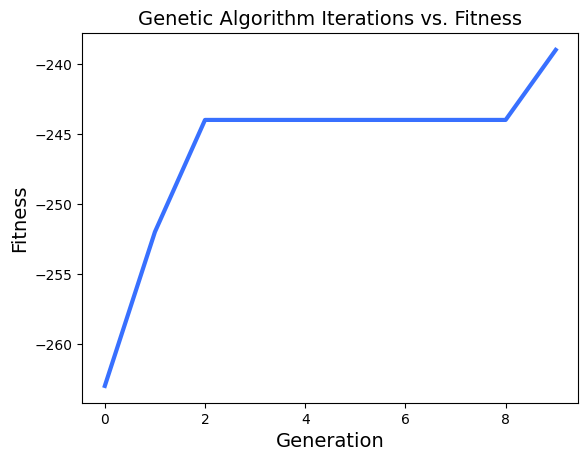

In [5]:
solution, solution_fitness, solution_idx, = ga_instance.best_solution()

print("Parameters of the best solution: ")
print(solution.reshape(len(processing_times), len(processing_times[0])))

print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))


print(ga_instance.generations_completed)

ga_instance.plot_fitness(title="Genetic Algorithm Iterations vs. Fitness")


For this kind of problem of NP-hard this is a great angle to manage it. The bigger the number the better. Since in the proposed solution there are similar amount of indexes of the machines we can assume that the algorithm works.

And amazingly it gives us the solution in approximately 100-200ms which is great. Thanks to the really simple fitness, stop criteria of `"saturate_7"` and population of 100.

Now we continue to more complex inputs. First 10x10.


In [6]:
# Since our fitness depends on the processing_times we have to redefined it to use with input of different dimensions
processing_times = m4


def fitness_func(solution: list[int], solution_idx: int = 0) -> int:
    number_of_jobs = len(processing_times)
    number_of_machines = len(processing_times[0])

    schedule: list[list[int]] = solution.reshape(
        number_of_jobs, number_of_machines)
    machine_times = np.zeros(number_of_machines)

    for i in range(len(schedule)):
        for j in range(len(schedule)):
            machine_idx = schedule[i, j]
            machine_times[machine_idx - 1] += processing_times[i, j]

    return -np.max(machine_times)

We init new GA instance


In [7]:
num_genes = len(processing_times) * len(processing_times[0])
sol_per_pop = 300

ga_instance = pg.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    gene_type=int,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    stop_criteria="saturate_7",
    mutation_percent_genes=mutation_percent_genes,
)
ga_instance.run()


Calculate it and print the solution


Parameters of the best solution: 
[[2 3 2 5 5 2 4 4 1 2]
 [2 2 2 4 2 4 1 2 2 1]
 [5 3 3 5 4 5 1 4 5 3]
 [3 5 2 4 1 4 2 1 3 3]
 [1 5 4 1 4 2 4 5 4 2]
 [4 2 3 5 4 3 1 4 1 3]
 [5 2 1 4 1 3 1 4 5 3]
 [4 3 4 1 1 4 5 5 5 1]
 [1 1 4 4 2 2 5 4 1 1]
 [3 2 1 3 5 5 5 4 4 4]]
Fitness value of the best solution = -1004.0
15


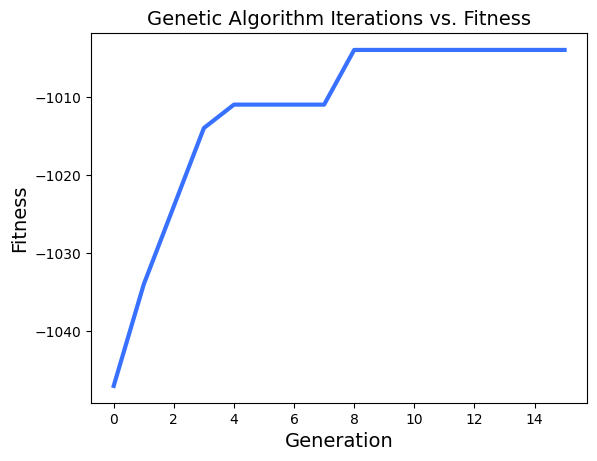

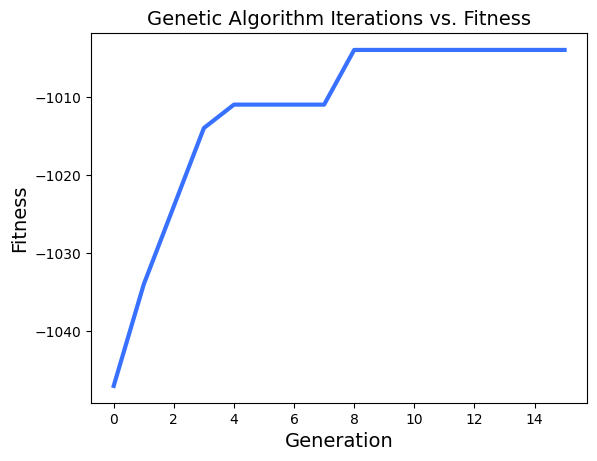

In [8]:
solution, solution_fitness, solution_idx, = ga_instance.best_solution()

print("Parameters of the best solution: ")
print(solution.reshape(len(processing_times), len(processing_times[0])))

print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))


print(ga_instance.generations_completed)

ga_instance.plot_fitness(title="Genetic Algorithm Iterations vs. Fitness")

Increasing the population we still get promising results. Since algorithm time is around 300ms. Now we can continue to 15x15.


In [9]:
# Since our fitness depends on the processing_times we have to redefined it to use with input of different dimensions
processing_times = m7


def fitness_func(solution: list[int], solution_idx: int = 0) -> int:
    number_of_jobs = len(processing_times)
    number_of_machines = len(processing_times[0])

    schedule: list[list[int]] = solution.reshape(
        number_of_jobs, number_of_machines)
    machine_times = np.zeros(number_of_machines)

    for i in range(len(schedule)):
        for j in range(len(schedule)):
            machine_idx = schedule[i, j]
            machine_times[machine_idx - 1] += processing_times[i, j]

    return -np.max(machine_times)

In [10]:
num_genes = len(processing_times) * len(processing_times[0])
sol_per_pop = 700

ga_instance = pg.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    gene_type=int,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    stop_criteria="saturate_7",
    mutation_percent_genes=mutation_percent_genes,
)
ga_instance.run()


Parameters of the best solution: 
[[4 4 1 2 1 2 4 1 4 2 2 1 4 2 4]
 [1 3 2 1 4 3 1 1 2 3 3 4 5 3 5]
 [1 1 4 3 3 3 5 5 2 2 1 2 1 4 2]
 [1 1 4 1 1 2 3 5 2 1 4 2 3 5 2]
 [5 5 5 3 2 4 5 5 5 3 4 4 2 4 5]
 [3 4 1 3 1 3 1 5 3 5 3 3 5 3 5]
 [4 5 4 1 2 1 2 2 4 1 4 3 2 2 3]
 [5 3 3 2 4 5 1 5 3 5 4 5 3 5 5]
 [1 5 5 4 3 5 3 3 1 2 1 5 3 1 1]
 [2 1 5 5 5 5 1 3 2 3 4 4 1 5 5]
 [3 1 5 2 3 3 5 5 4 2 5 1 4 5 3]
 [3 3 3 3 2 3 3 4 4 1 4 3 4 2 2]
 [4 1 1 4 4 2 2 4 4 1 4 3 4 4 1]
 [1 1 4 1 5 4 1 2 3 2 2 5 1 2 3]
 [2 1 5 4 5 5 4 4 4 3 3 1 2 5 2]]
Fitness value of the best solution = -2334.0
9


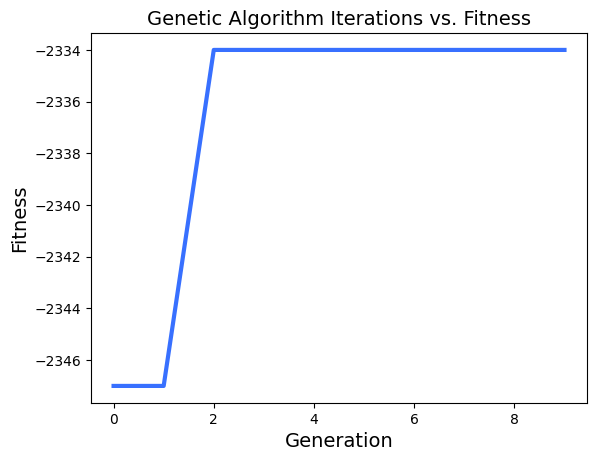

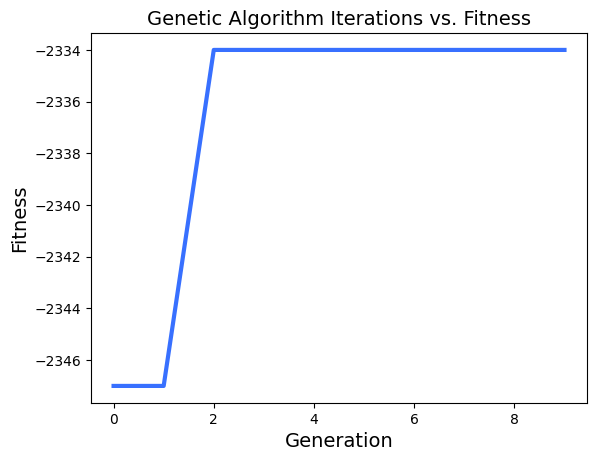

In [11]:
solution, solution_fitness, solution_idx, = ga_instance.best_solution()

print("Parameters of the best solution: ")
print(solution.reshape(len(processing_times), len(processing_times[0])))

print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))


print(ga_instance.generations_completed)

ga_instance.plot_fitness(title="Genetic Algorithm Iterations vs. Fitness")

Finally at the most complexity algorithm holds strong. With calculation time of about 1.3s and promising proposition of resolution. Also fitness score decreased for each level of complexity since it the more complex schedule the more time it is required to finish it.
